In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
products = pd.read_csv('amazon_baby.csv')

In [3]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [4]:
def remove_punctuation(text):
    import string
    table = str.maketrans({k:None for k in string.punctuation})
    return text.translate(table)

In [5]:
products = products.fillna({'review':''})

In [6]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [7]:
products.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


In [8]:
products = products[products['rating'] != 3]

In [9]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [10]:
products.head()

,name,review,rating,review_clean,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,1


In [11]:
train_idx = pd.read_json('module-9-assignment-train-idx.json')[0]
test_idx = pd.read_json('module-9-assignment-test-idx.json')[0]

In [12]:
train_data = products.iloc[train_idx]
test_data = products.iloc[test_idx]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

In [14]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(train_matrix,train_data['sentiment'])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=test_data['sentiment'].to_numpy(), y_pred=model.predict(test_matrix))
print("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.9322054235661147


In [16]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.8427825773938085


In [18]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_data['sentiment'].to_numpy(),
                        y_pred=model.predict(test_matrix),
                        labels=model.classes_)    # use the same order of class as the LR model.
print(' target_label | predicted_label | count ')
print('--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |  3786
     -1       |        1        |  1455
      1       |       -1        |   805
      1       |        1        | 27290


In [19]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=test_data['sentiment'].to_numpy(), 
                            y_pred=model.predict(test_matrix))
print("Precision on test data: %s" % precision)

Precision on test data: 0.9493825013045747


In [21]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=test_data['sentiment'].to_numpy(),
                      y_pred=model.predict(test_matrix))
print("Recall on test data: %s" % recall)

Recall on test data: 0.9713472148069051


In [22]:
probabilities = model.predict_proba(test_matrix)[:,1]

In [28]:
def apply_threshold(probabilities, threshold):
    predication = np.zeros(len(probabilities))
    predication[probabilities>threshold] = 1
    predication[probabilities<=threshold] = -1
    return predication

In [24]:
probabilities = model.predict_proba(test_matrix)[:,1]

In [29]:
discrete_result = apply_threshold(probabilities, 0.9)

In [30]:
np.sum((discrete_result==-1)&(test_data['sentiment']==1))

3494

In [31]:
np.sum(discrete_result==1)

25062

In [32]:
np.sum(model.predict(test_matrix)==1)

28745

In [33]:
threshold_values = np.linspace(0.5, 1, num=100)
print(threshold_values)

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

In [41]:
from matplotlib import pyplot as plt
import itertools
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

In [39]:
precision_all=[precision_score(y_true=test_data['sentiment'].values,y_pred=apply_threshold(probabilities,i)) \
            for i in threshold_values[:-1]]
recall_all=[recall_score(y_true=test_data['sentiment'].values,y_pred=apply_threshold(probabilities,i)) \
         for i in threshold_values[:-1]]

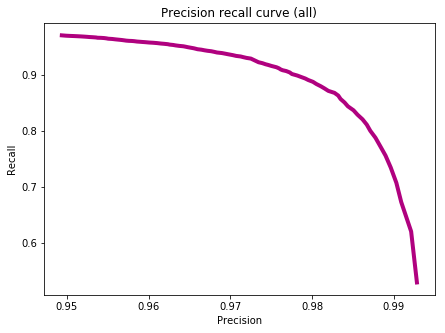

In [42]:
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [47]:
pr_mat=pd.DataFrame({'threshold':threshold_values[:-1],'precision':precisions,'recall':recalls})

In [48]:
pr_mat[pr_mat['threshold']>=0.979].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
95,0.979798,0.990331,0.707279
96,0.984848,0.990930,0.672718
97,0.989899,0.992141,0.620110
98,0.994949,0.992850,0.528813


In [49]:
pr_mat[pr_mat['precision']>=0.965].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
41,0.707071,0.965117,0.949315
42,0.712121,0.965532,0.948211
43,0.717172,0.965750,0.947428
44,0.722222,0.965998,0.946503
45,0.727273,0.966462,0.945684


In [50]:
test_data['name']=test_data['name'].str.lower()

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
baby_reviews = test_data[test_data['name'].str.contains('baby').values == True]

In [62]:
baby_reviews.head()

,name,review,rating,review_clean,sentiment
9,"baby tracker&reg; - daily childcare journal, s...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"baby tracker&reg; - daily childcare journal, s...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1
56,baby's first year undated wall calendar with s...,I searched high and low for a first year calen...,5,I searched high and low for a first year calen...,1
59,our baby girl memory book,Absolutely love it and all of the Scripture in...,5,Absolutely love it and all of the Scripture in...,1
112,newborn baby tracker&reg; - round the clock ch...,This is the best way to keep track of when you...,5,This is the best way to keep track of when you...,1


In [63]:
baby_matrix = vectorizer.transform(baby_reviews['review_clean'])
probabilities = model.predict_proba(baby_matrix)[:,1]

In [64]:
threshold_values = np.linspace(0.5, 1, num=100)

In [67]:
precision_all = [precision_score(y_true=baby_reviews['sentiment'].values,y_pred=apply_threshold(probabilities,i)) \
                 for i in threshold_values[:-1]]
recall_all =[recall_score(y_true=baby_reviews['sentiment'].values,y_pred=apply_threshold(probabilities,i)) \
            for i in threshold_values[:-1]]

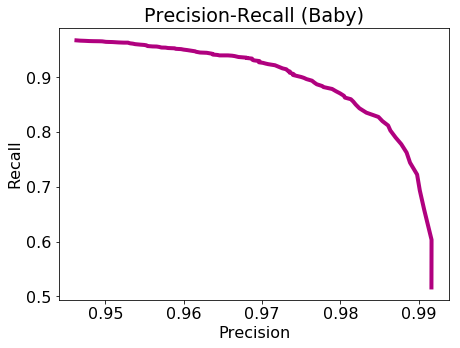

In [68]:
plot_pr_curve(precision_all, recall_all, "Precision-Recall (Baby)")

In [70]:
bb_mat=pd.DataFrame({'threshold':threshold_values[:-1],'precision':precision_all,'recall':recall_all})

In [71]:
bb_mat[bb_mat['precision']>=0.965].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
45,0.727273,0.965640,0.940011
46,0.732323,0.966162,0.939466
47,0.737374,0.966498,0.938738
48,0.742424,0.966986,0.937102
49,0.747475,0.968033,0.935830
